# 线性回归 sklearn实现

上面的内容中，我们学习了什么是最小二乘法，以及使用 Python 对最小二乘线性回归进行了完整实现。那么，我们如何利用机器学习开源模块 scikit-learn 实现最小二乘线性回归方法呢？

使用 scikit-learn 实现线性回归的过程会简单很多，这里要用到 LinearRegression() 类 。看一下其中的参数：

`sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)`
"""
- fit_intercept: 默认为 True，计算截距项。
- normalize: 默认为 False，不针对数据进行标准化处理。
- copy_X: 默认为 True，即使用数据的副本进行操作，防止影响原数据。
- n_jobs: 计算时的作业数量。默认为 1，若为 -1 则使用全部 CPU 参与运算
"""

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
x = np.array([56, 72, 69, 88, 102, 86, 76, 79, 94, 74])
y = np.array([92, 102, 86, 110, 130, 99, 96, 102, 105, 92])  # 绘制直线生成的临时点
model = LinearRegression()
model.fit(x.reshape(len(x),1),y)
model.intercept_,model.coef_  # 得到模型拟合参数
# intercept_得到截距，model.coef_得到w权重

(41.335091685506185, array([0.75458428]))

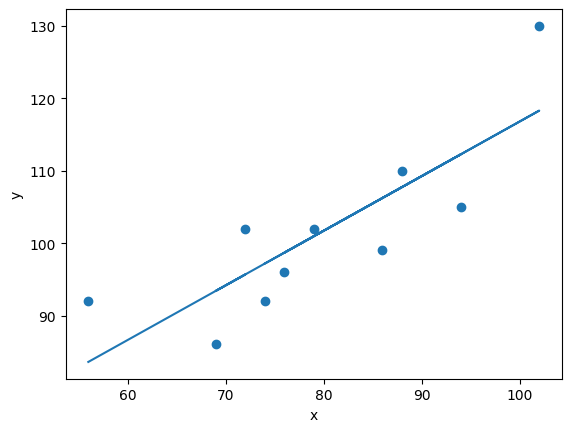

In [22]:
fig,axes = plt.subplots()
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.scatter(x,y)
y_ = model.predict(x.reshape(-1,1))  # 预测值
axes.plot(x,y_)

# 实战

In [24]:
import pandas as pd
df = pd.read_csv("https://labfile.oss.aliyuncs.com/courses/1081/course-5-boston.csv")

In [ ]:
df.head(-1) #所有的


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


- CRIM: 城镇犯罪率。
- ZN: 占地面积超过 2.5 万平方英尺的住宅用地比例。
- INDUS: 城镇非零售业务地区的比例。
- CHAS: 查尔斯河是否经过 (=1 经过，=0 不经过)。
- NOX: 一氧化氮浓度（每 1000 万份）。
- RM: 住宅平均房间数。
- AGE: 所有者年龄。
- DIS: 与就业中心的距离。
- RAD: 公路可达性指数。
- TAX: 物业税率。
- PTRATIO: 城镇师生比例。
- BLACK: 城镇的黑人指数。
- LSTAT: 人口中地位较低人群的百分数。
- MEDV: 城镇住房价格中位数。
本次实验只选取CRIM,RM,LSTAT三个特征用于线性回归模型训练

In [ ]:
features = df[['crim','rm','lstat']]
features.describe() # g个数，均值，最小值，最大值，方差等等


,crim,rm,lstat
count,506.000000,506.000000,506.000000
mean,3.593761,6.284634,12.653063
std,8.596783,0.702617,7.141062
min,0.006320,3.561000,1.730000
25%,0.082045,5.885500,6.950000
50%,0.256510,6.208500,11.360000
75%,3.647423,6.623500,16.955000
max,88.976200,8.780000,37.970000


In [31]:
target = df['medv'] # 目标值数据
split_num = int(len(features)*0.7)
x_train = features[:split_num]
y_train = target[:split_num]

x_test = features[split_num:]
y_test = target[split_num:]


In [33]:
# 构建和训练模型
model = LinearRegression()
model.fit(x_train,y_train)
model.coef_,model.intercept_

(array([ 0.69979497, 10.13564218, -0.20532653]), -38.000969889690325)

In [34]:
preds = model.predict(x_test)  # 输入测试集特征进行预测
preds  # 预测结果

array([17.77439141, 21.09512448, 27.63412265, 26.78577951, 25.38313368,
       24.3286313 , 28.4257879 , 25.12834727, 16.82806601, 20.76498858,
       52.3350748 , -0.18169806, 12.01475786,  7.87878077, 15.13155699,
       32.93748235, 37.07872049, 29.50613719, 25.50800832, 12.35867972,
        9.08901644, 47.08374238, 35.31759193, 33.3738765 , 38.34913316,
       33.10414639, 91.3556125 , 35.11735022, 19.69326952, 18.49805269,
       14.03767555, 20.9235166 , 20.41406182, 21.92218226, 15.20451678,
       18.05362998, 21.26289453, 23.18192502, 15.87149504, 27.70381826,
       27.65958772, 30.17151829, 27.04987446, 21.52730227, 37.82614512,
       22.09872387, 34.71166346, 32.07959454, 29.45253042, 29.51137956,
       41.49935191, 62.4121152 , 13.64508882, 24.71242033, 18.69151684,
       37.4909413 , 54.05864658, 34.94758034, 15.01355249, 30.17849355,
       32.22191275, 33.90252834, 33.02530285, 28.4416789 , 69.60201087,
       34.7617152 , 31.65353442, 24.5644437 , 24.78130285, 24.00

In [39]:
# 平均绝对误差 mae
def mae_value(y_true,y_pred):
    n = len(y_true)
    mae = sum(np.abs(y_true-y_pred))/n
    return mae

In [37]:
# 均方误差 mse
def mse_value(y_true,y_pred):
    n = len(y_true)
    mse = sum((y_pred-y_true)**2)/n
    return mse

In [40]:
mae = mae_value(y_test.values, preds)
mse = mse_value(y_test.values, preds)

print("MAE: ", mae)
print("MSE: ", mse)

MAE:  13.0220630727803
MSE:  303.8331247223644
